## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Aug 24 12:05:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Install YOLOv5


In [2]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17549, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 17549 (delta 26), reused 3 (delta 3), pack-reused 17502 (from 2)
Receiving objects: 100% (17549/17549), 16.66 MiB | 26.29 MiB/s, done.
Resolving deltas: 100% (12023/12023), done.


In [3]:
# install dependencies as necessary
!pip install -r requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Setup complete. Using torch 2.8.0+cu126 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=8c5c77ae-2bff-607a-9669-a7d5390984bc, pci_bus_id=0, pci_device_id=4, pci_domain_id=0, L2_cache_size=4MB)


## Step 6: Download a Dataset

Run the code below to authenticate with Roboflow and download the dataset. Follow the link to generate an authentication token.

Alternatively, provide an API key like so: `rf = Roboflow(api_key=...)`

> 🟢 **Tip:** The examples below work even if you use our non-custom dataset. However, you won't be able to deploy the model to Roboflow. To do that, create a custom dataset as described above or fork (copy) one into your [workspace](https://app.roboflow.com/) from [Universe](https://universe.roboflow.com/).

In [4]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wJBBQfaNuQEzPQr1YSIu")
project = rf.workspace("crash-detection-nptx7").project("cctv-crash")
version = project.version(3)
dataset = version.download("yolov5")


/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CCTV-crash-3 in yolov5pytorch:: 100%|██████████| 4654/4654 [00:00<00:00, 6994.36it/s]


# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **cache:** cache images for faster training

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.1 MB/s eta 0:00:00


In [8]:
# train yolov5s on custom data for 25 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 100 \
  --data /content/yolov5/CCTV-crash-3/data.yaml \
  --weights yolov5n.pt \
  --name yolov5n_results  \
  --cache

Streaming output truncated to the last 5000 lines.
      80/99      1.03G    0.02244    0.02226   0.001393        274        416:  76% 97/127 [00:13<00:03,  7.61it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      80/99      1.03G    0.02242    0.02227   0.001397        198        416:  76% 97/127 [00:13<00:03,  7.61it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      80/99      1.03G    0.02244    0.02232   0.001407        214        416:  78% 99/127 [00:13<00:03,  8.04it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      80/99      1.03G    0.02242 

# Evaluate Custom YOLOv5 Detector Performance

You can view the training graphs associated with a training job in the `/content/yolov5/runs/train/yolov5s_results/results.png` folder.

Training losses and performance metrics are also saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [11]:
# Convert the best.pt model to ONNX format
%cd /content/yolov5/
!python export.py --weights /content/yolov5/runs/train/yolov5n_results/weights/best.pt --include onnx

/content/yolov5
export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/yolov5n_results/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-426-g6f603b8c Python-3.12.11 torch-2.8.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/yolov5n_results/weights/best.pt with output shape (1, 25200, 8) (3.6 MB)

ONNX: starting export with onnx 1.18.0...
/content/yolov5/export.py:346: DeprecationWarning: You are using the legacy TorchScript-based ONNX export. Starting in PyTorch 2.9, the new torch.export-based ONNX exporter will be the default. To switch now, set dynamo=T

In [12]:
# Convert the best.pt model to TFLITE format
%cd /content/yolov5/
!python export.py --weights /content/yolov5/runs/train/yolov5n_results/weights/best.pt --include tflite

/content/yolov5
export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/yolov5n_results/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-426-g6f603b8c Python-3.12.11 torch-2.8.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/yolov5n_results/weights/best.pt with output shape (1, 25200, 8) (3.6 MB)
2025-08-24 12:45:23.807085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756039523.833140   10628 cuda_dnn.cc:85

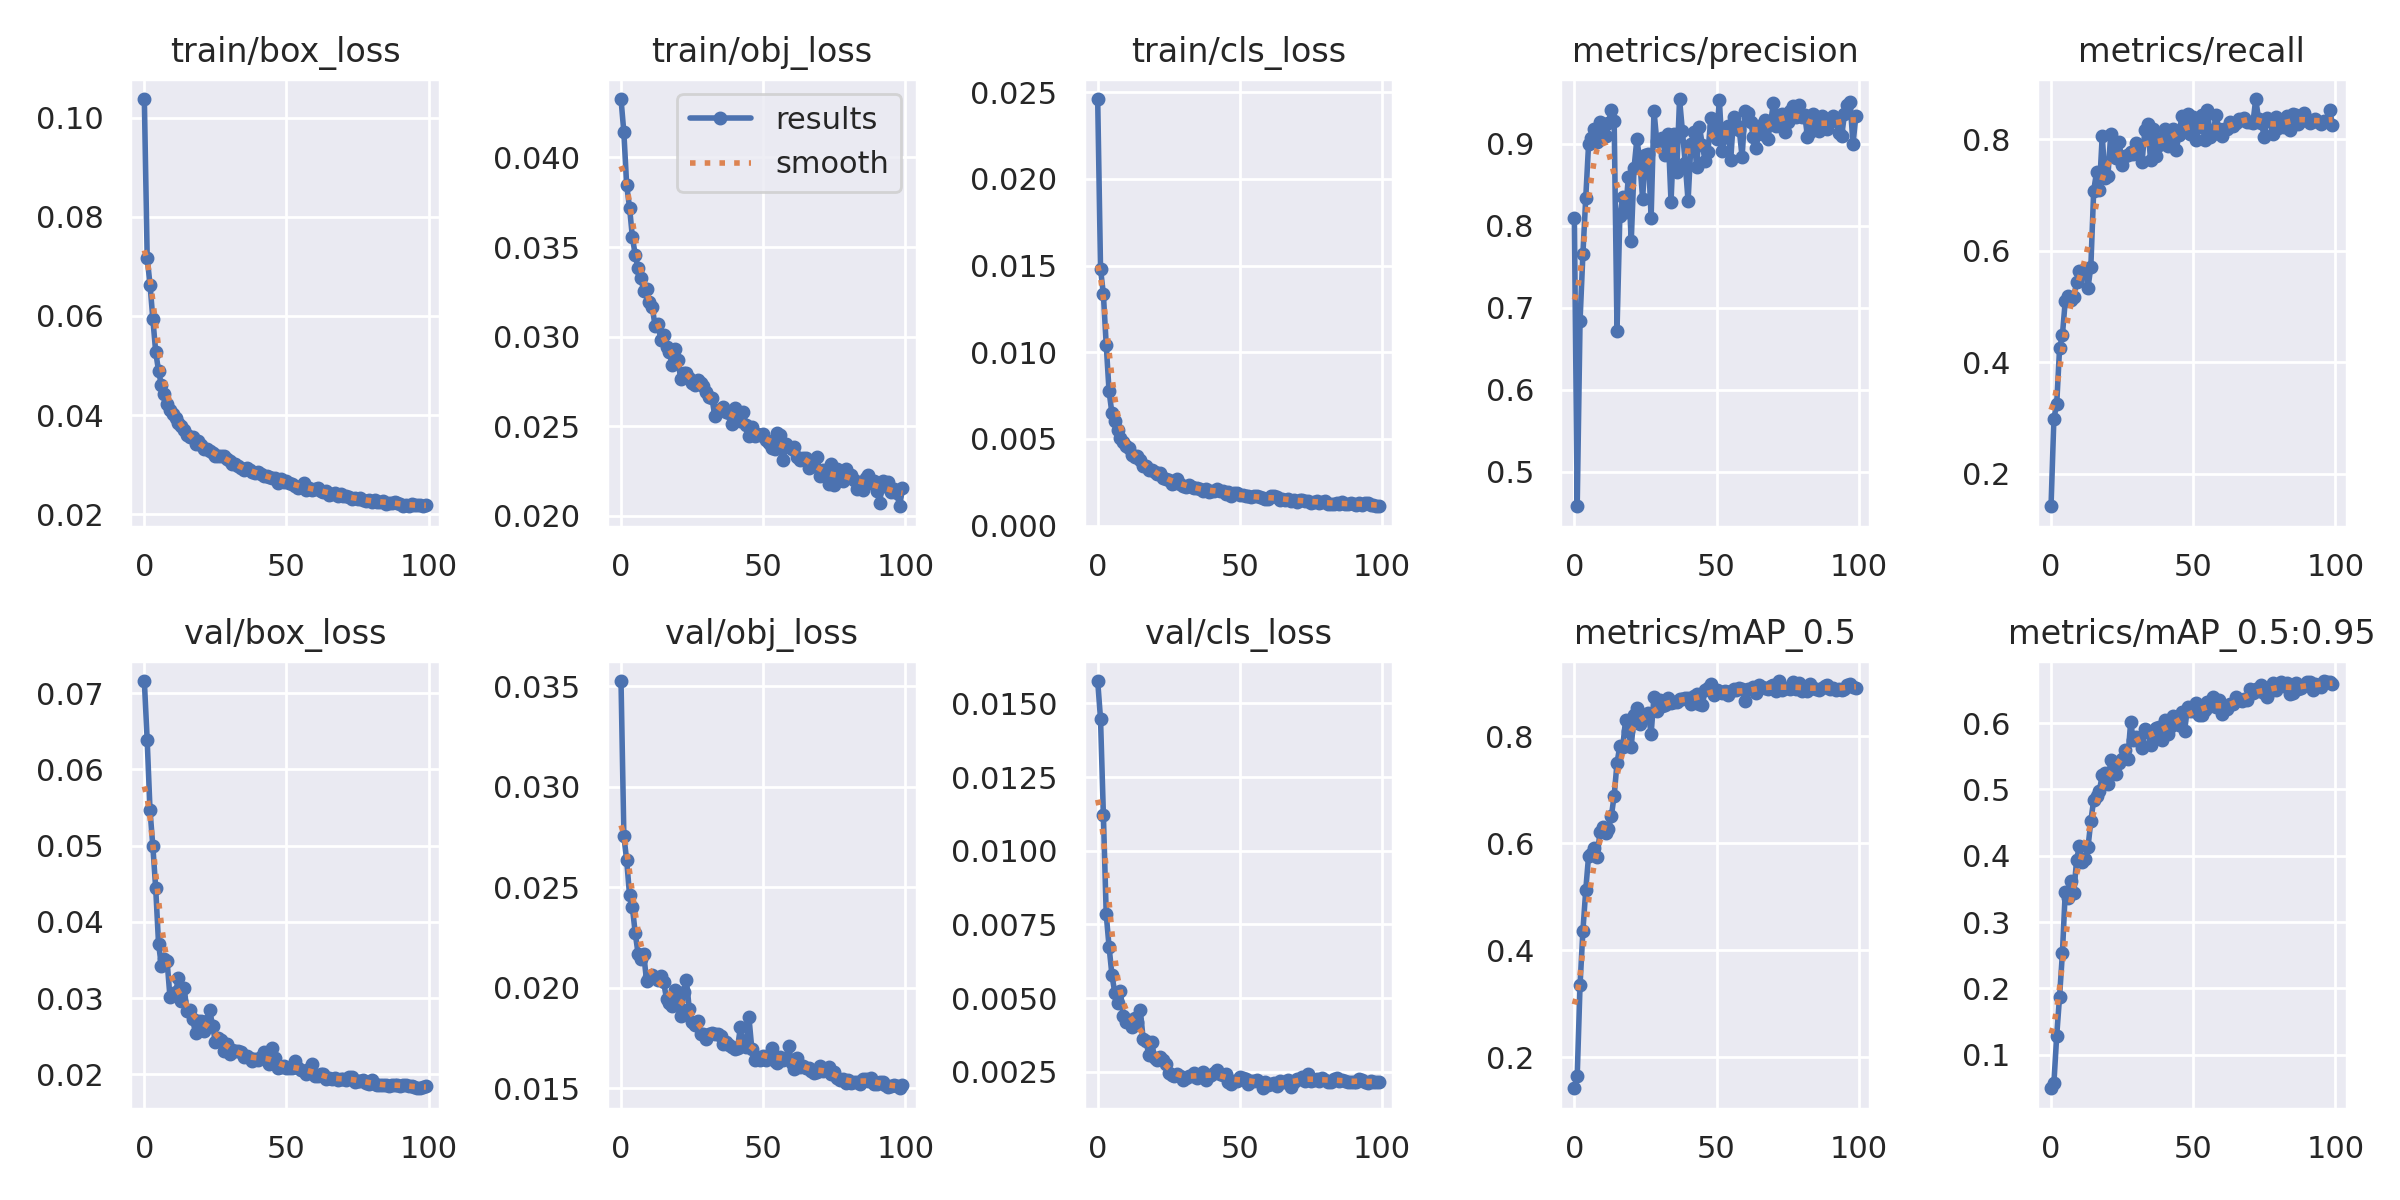

In [13]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5n_results/results.png', width=1000)

In [15]:
# Validate the best.pt model
%cd /content/yolov5/
!python val.py --weights /content/yolov5/runs/train/yolov5n_results/weights/best.pt --data /content/yolov5/CCTV-crash-3/data.yaml --img 416 --conf 0.50

/content/yolov5
val: data=/content/yolov5/CCTV-crash-3/data.yaml, weights=['/content/yolov5/runs/train/yolov5n_results/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.5, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.5 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-426-g6f603b8c Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
val: Scanning /content/yolov5/CCTV-crash-3/valid/labels.cache... 193 images, 0 backgrounds, 0 corrupt: 100% 193/193 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:03<00:00,  1.79it/s]
                   all        193       1596      0.953       0.82      0.